# **Exploratory Data Analysis**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Read CSV file
df = pd.read_csv('../data/processed/cleaned_online_retail.csv')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522480 non-null  int64  
 1   StockCode    522480 non-null  object 
 2   Description  522480 non-null  object 
 3   Quantity     522480 non-null  int64  
 4   InvoiceDate  522480 non-null  object 
 5   UnitPrice    522480 non-null  float64
 6   CustomerID   391093 non-null  float64
 7   Country      522480 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [4]:
# Change InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# Make CsstomerID as an object
df['CustomerID'] = df['CustomerID'].astype(str).str.replace('.0', '', regex=False)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522480 entries, 0 to 522479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522480 non-null  int64         
 1   StockCode    522480 non-null  object        
 2   Description  522480 non-null  object        
 3   Quantity     522480 non-null  int64         
 4   InvoiceDate  522480 non-null  datetime64[ns]
 5   UnitPrice    522480 non-null  float64       
 6   CustomerID   522480 non-null  object        
 7   Country      522480 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 31.9+ MB


# **Checking Outliers**


##### **Checking Outlier : UnitPrice**

In [7]:
# Generate summary statistics for the 'UnitPrice' column
df['UnitPrice'].describe()

count    522480.000000
mean          3.273892
std           4.393241
min           0.040000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

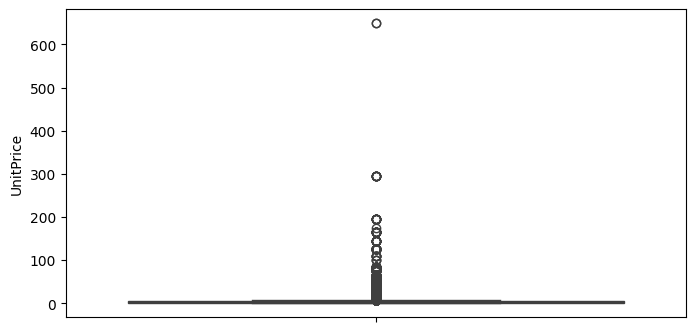

In [8]:
#Checking for OutLiers : UnitPrice using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(y = df['UnitPrice'])
plt.show()

In [9]:
df.loc[df['UnitPrice'] >= 600].value_counts()
       

InvoiceNo  StockCode  Description                     Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
556444     22502      PICNIC BASKET WICKER 60 PIECES  60        2011-06-10 15:28:00  649.5      15098       United Kingdom    1
556446     22502      PICNIC BASKET WICKER 60 PIECES  1         2011-06-10 15:33:00  649.5      15098       United Kingdom    1
Name: count, dtype: int64

The boxplot highlights **UnitPrice ≥ 600** as statistical outliers, but further investigation confirms they are **valid transactions**. The product *"PICNIC BASKET WICKER 60 PIECES"* (StockCode: 22502) appears twice with a **consistent price of 649.5**, indicating it is not a data entry error. The time difference between transactions (5 minutes) supports that these were legitimate sales. Since these are valid data points, no modifications are needed. However, their impact on summary statistics should be considered when analyzing pricing patterns.


##### **Checking Outlier : Quantity**

In [10]:
# Generate summary statistics for the 'Quantity' column
df['Quantity'].describe()

count    522480.000000
mean         10.643267
std         156.603097
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

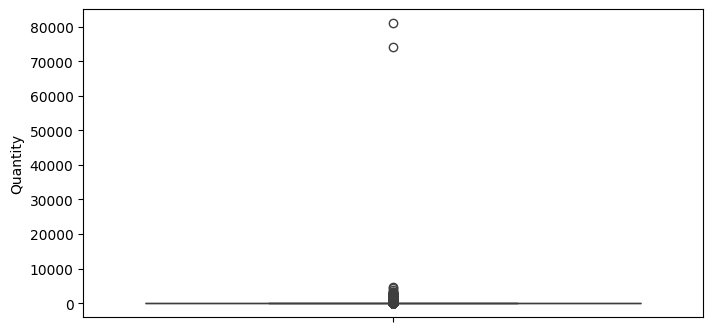

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [12]:
df[df['Quantity']>= 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
59407,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
521013,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [13]:
df = df[df['Quantity']< 70000]

The boxplot highlights **Quantity ≥ 70,000** as extreme values. Upon inspection, two transactions exceed this threshold:  
- **74215 units** of *"MEDIUM CERAMIC TOP STORAGE JAR"*,  
- **80995 units** of *"PAPER CRAFT, LITTLE BIRDIE"*.  

These values likely represent bulk purchases that significantly skew the distribution. To ensure meaningful analysis, these two records will be removed from the dataset, allowing for a more representative understanding of typical order quantities.


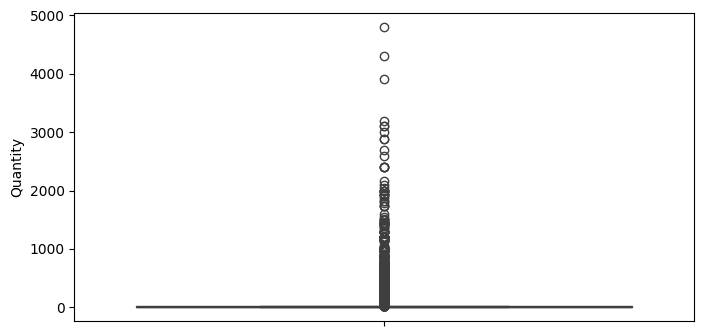

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['Quantity'])
plt.show()

In [15]:
df[df['Quantity']> 4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
198423,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
406236,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom


In [16]:
Q1 = df['Quantity'].quantile(0.25)  
Q3 = df['Quantity'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
valid_transactions = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outlier Transactions: {outliers.shape[0]}")
print(f"Number of Valid Transactions: {valid_transactions.shape[0]}")


Q1: 1.0, Q3: 12.0, IQR: 11.0
Lower Bound: -15.5, Upper Bound: 28.5
Number of Outlier Transactions: 26813
Number of Valid Transactions: 495665


In [17]:
df['z_score'] = zscore(df['Quantity'])  
df_outliers = df[df['z_score'].abs() > 3]  
print(f"Number of Outliers with Z-score > 3: {df_outliers.shape[0]}")  

Number of Outliers with Z-score > 3: 4008


**Validity of Large Quantity Transactions** <br>
<br>
Transactions with Quantity > 4000 are statistical outliers but valid business transactions. The dataset includes 4,300 units of SMALL POPCORN HOLDER and 4,800 units of WORLD WAR 2 GLIDERS ASSTD DESIGNS, both from the UK. Given their low unit prices (£0.72 and £0.21), these are likely bulk purchases by resellers or event organizers, common in B2B transactions.  

**Outlier Analysis (IQR & Z-score)**  
- **IQR Method:** Outliers (**26,813**), Valid Transactions (**495,665**)  
- **Z-score > 3:** Outliers (**4,008**)  

**Key Insight**  
Statistical outliers aren’t always errors. Many bulk transactions exceed 28.5 units but are legitimate sales, emphasizing the importance of business context over statistics rather than relying solely on numerical thresholds.  


##### **Checking Outlier : Sales**

In [18]:
# Calculate total sales for each transaction by multiplying quantity sold by unit price
df['sales'] = df['Quantity'] * df['UnitPrice']


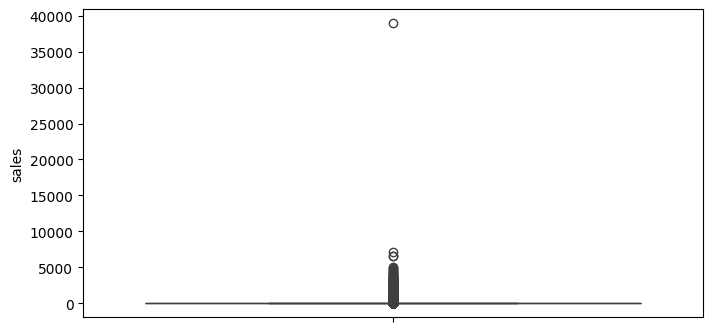

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(y = df['sales'])
plt.show()

In [20]:
df[df['sales']> 35000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score,sales
214379,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,1.311646,38970.0


In [21]:
df.drop(df[df['sales'] > 35000].index, inplace=True)

Even though this transaction is **a valid sale**, its **extremely high unit price (£649.5)** makes it an anomaly compared to the rest of the dataset. Unlike other high-sales transactions driven by **large quantities**, this one stands out solely due to its **unit price**, which is significantly higher than typical values.  

Keeping it could **skew sales analysis, distort average price calculations, and misrepresent business trends**. Since the dataset primarily consists of small retail items, removing this transaction ensures a more **accurate representation of sales patterns** while maintaining the overall **business context**.


In [27]:
df_clean = df.copy()

# **Total Sales Per Mounth**


In [31]:
min_date = min(df['InvoiceDate'])

min_date


Timestamp('2010-12-01 08:26:00')

In [32]:
max_date = max(df['InvoiceDate'])
max_date


Timestamp('2011-12-09 12:50:00')

In [33]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

In [35]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score,sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-0.114810,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-0.061978,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.114810,20.34,2010-12


In [37]:
df_clean_agg = df_clean.groupby('Month')['sales'].sum().reset_index()

In [38]:
df_clean_agg['Month'] = df_clean_agg['Month'].astype('str')

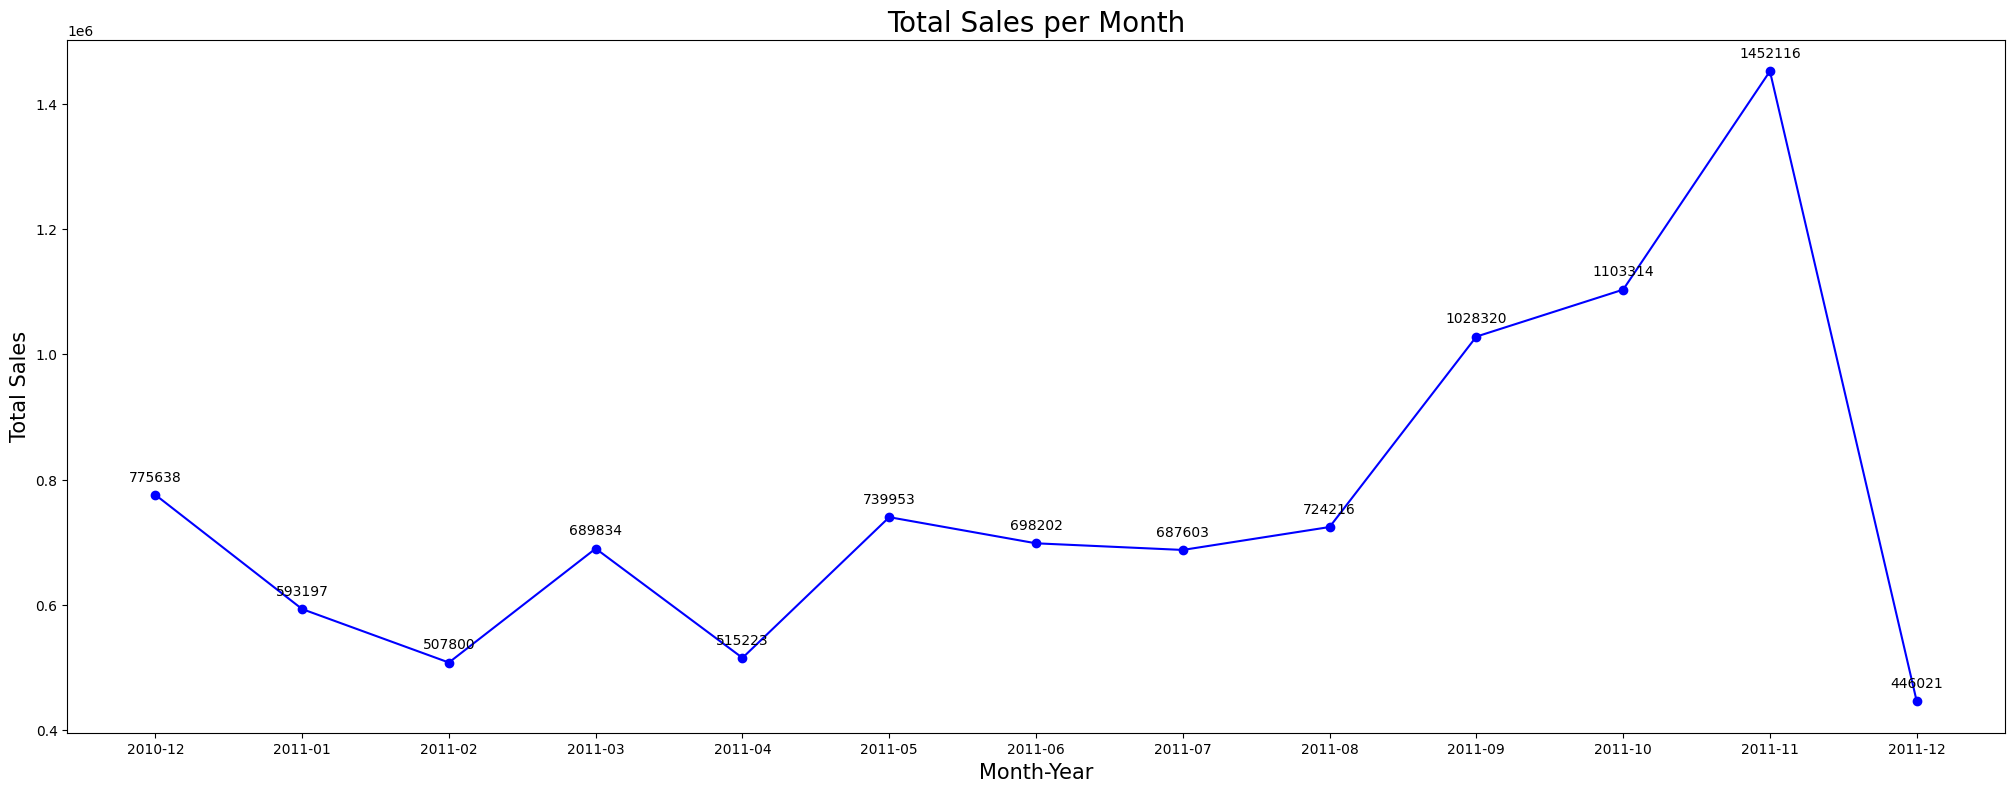

In [40]:
plt.figure(figsize=(25,9))
plt.title('Total Sales per Month',fontsize=20)
plt.xlabel('Month-Year',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)

x = df_clean_agg['Month']
y = df_clean_agg['sales']

# 'bo-' means blue color, round points, solid lines
plt.plot(x,y,'bo-')

# zip joins x and y coordinates in pairs
for x,y in zip(x,y):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()